In [1]:
# import module list is independent on respective file.

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import yfinance as yf

from datetime import datetime as dt
from datetime import date as date
from datetime import timedelta
from dateutil.relativedelta import relativedelta

import seaborn as sns
from scipy.stats import mstats

from tqdm.notebook import tqdm

import japanize_matplotlib



In [2]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
    '''
    fi = model.feature_importances_
      fi_df = pd.DataFrame({'feature': list(X.columns),
                             'feature importance': fi[:]}).sort_values('feature importance', ascending = False)
      fi_df
      sns.barplot(fi_df['feature importance'],fi_df['feature'])
      plt.title("imporance in the Light GBM Model")
    
    '''

In [3]:
data = pd.read_csv('data/upgradedatafolder/PER_n_PBR.csv')
data.columns=['日付',
 'PER加重平均',
 'PER指数ベース',
 'PBR加重平均',
 'PBR指数ベース',
 '利回り単純計算',
 '利回り指数ベース',
 'EPS加重平均',
 'EPS指数ベース',
 'BPS加重平均',
 'BPS指数ベース']

In [10]:
data = pd.read_csv('data/upgradedatafolder/PER_n_PBR.csv', index_col='日付', parse_dates=True, encoding='utf-8')

In [11]:
for key in ['EPS加重平均', 'EPS指数ベース', 'BPS加重平均', 'BPS指数ベース']:
    try:
        data[key] = [float(i.replace(',', '')) for i in data[key]]
    except:
        continue

<Axes: >

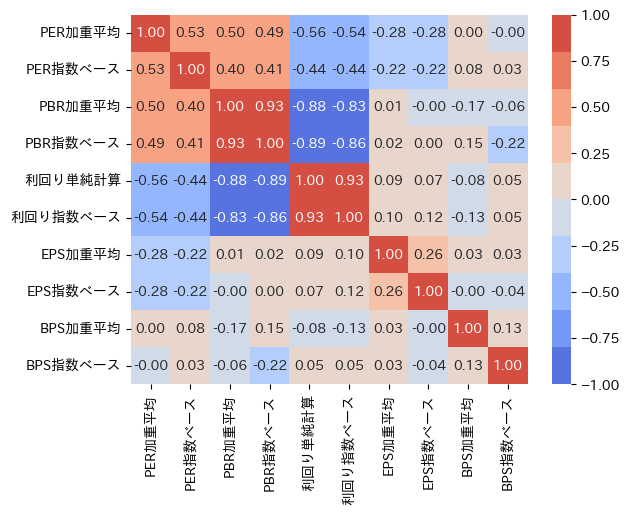

In [12]:
cor = data.pct_change().corr()
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

In [7]:
import os 
for i in os.listdir('data/upgradedatafolder/'):
    print(i)

.ipynb_checkpoints
arbitrage.csv
BADI.csv
detail.csv
foreigner_sum.csv
foreigner_sum元データ.csv
karauriratio.csv
market_overview.csv
PER_n_PBR.csv
SCFI_n_CCFI.csv
substance_foreigner.csv


In [ ]:
data.corr()

In [144]:
data3 = pd.read_csv('data/upgradedatafolder/substance_foreigner.csv', index_col=0, parse_dates=True, encoding='utf-8')

display(data3)
'''
for i, j in enumerate(data3.index[::100]):
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    #Price_day['N225'].loc[j:data.index[i+100], 'Close'].plot(color='gray', alpha=0.4, ax=ax)
    data3.loc[j:,:].head(100).plot(ax=ax2, legend=True)
    plt.figure()
'''

,現物,ラージ,ミニ,TOPIX,先物合計,現物先物合計,Date
2013-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,3.647000e+11,-2.390000e+11,8.640000e+10,3.500000e+09,-1.489000e+11,2.157000e+11,2021-01-06
2021-01-13,2.614000e+11,-3.824000e+11,2.209000e+11,-5.140000e+10,-2.129000e+11,4.840000e+10,2021-01-13
2021-01-20,-1.340000e+11,7.470000e+10,1.040000e+10,-1.900000e+09,8.320000e+10,-5.070000e+10,2021-01-20
2021-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


"\nfor i, j in enumerate(data3.index[::100]):\n    fig, ax = plt.subplots()\n    ax2 = ax.twinx()\n    #Price_day['N225'].loc[j:data.index[i+100], 'Close'].plot(color='gray', alpha=0.4, ax=ax)\n    data3.loc[j:,:].head(100).plot(ax=ax2, legend=True)\n    plt.figure()\n"

In [145]:
data3 = data3[:-5]

In [31]:
# '現物', 'ラージ', 'ミニ', 'TOPIX', '先物合計', '現物先物合計'
data3.columns

Index(['現物', 'ラージ', 'ミニ', 'TOPIX', '先物合計', '現物先物合計', 'Date'], dtype='object')

In [186]:
data.tail(1)

,売り残,売り残前回比,買い残,買い残前回比,差引
日付,,,,,
2024-10-04,132300000000,-26300000000,1854600000000,-133500000000,1712400000000


In [48]:
for i, _ in data.iterrows():
    #display(data3[['現物', '先物合計', '現物先物合計']][i])
    try:
        data.loc[i, ['現物', '先物合計', '現物先物合計']] = data3.loc[i:, ['現物', '先物合計', '現物先物合計']].head(1).values[0]
    except Exception as e:
        print(i, e)
        continue

2006-05-22 00:00:00 Timestamp('2006-05-22 00:00:00')
2006-05-23 00:00:00 Timestamp('2006-05-23 00:00:00')
2006-05-24 00:00:00 Timestamp('2006-05-24 00:00:00')
2006-05-25 00:00:00 Timestamp('2006-05-25 00:00:00')
2006-05-26 00:00:00 Timestamp('2006-05-26 00:00:00')
2006-05-29 00:00:00 Timestamp('2006-05-29 00:00:00')
2006-05-30 00:00:00 Timestamp('2006-05-30 00:00:00')
2006-05-31 00:00:00 Timestamp('2006-05-31 00:00:00')
2006-06-01 00:00:00 Timestamp('2006-06-01 00:00:00')
2006-06-02 00:00:00 Timestamp('2006-06-02 00:00:00')
2006-06-05 00:00:00 Timestamp('2006-06-05 00:00:00')
2006-06-06 00:00:00 Timestamp('2006-06-06 00:00:00')
2006-06-07 00:00:00 Timestamp('2006-06-07 00:00:00')
2006-06-08 00:00:00 Timestamp('2006-06-08 00:00:00')
2006-06-09 00:00:00 Timestamp('2006-06-09 00:00:00')
2006-06-12 00:00:00 Timestamp('2006-06-12 00:00:00')
2006-06-13 00:00:00 Timestamp('2006-06-13 00:00:00')
2006-06-14 00:00:00 Timestamp('2006-06-14 00:00:00')
2006-06-15 00:00:00 Timestamp('2006-06-15 00:0

2008-05-30 00:00:00 Timestamp('2008-05-30 00:00:00')
2008-06-02 00:00:00 Timestamp('2008-06-02 00:00:00')
2008-06-03 00:00:00 Timestamp('2008-06-03 00:00:00')
2008-06-04 00:00:00 Timestamp('2008-06-04 00:00:00')
2008-06-05 00:00:00 Timestamp('2008-06-05 00:00:00')
2008-06-06 00:00:00 Timestamp('2008-06-06 00:00:00')
2008-06-09 00:00:00 Timestamp('2008-06-09 00:00:00')
2008-06-10 00:00:00 Timestamp('2008-06-10 00:00:00')
2008-06-11 00:00:00 Timestamp('2008-06-11 00:00:00')
2008-06-12 00:00:00 Timestamp('2008-06-12 00:00:00')
2008-06-13 00:00:00 Timestamp('2008-06-13 00:00:00')
2008-06-16 00:00:00 Timestamp('2008-06-16 00:00:00')
2008-06-17 00:00:00 Timestamp('2008-06-17 00:00:00')
2008-06-18 00:00:00 Timestamp('2008-06-18 00:00:00')
2008-06-19 00:00:00 Timestamp('2008-06-19 00:00:00')
2008-06-20 00:00:00 Timestamp('2008-06-20 00:00:00')
2008-06-23 00:00:00 Timestamp('2008-06-23 00:00:00')
2008-06-24 00:00:00 Timestamp('2008-06-24 00:00:00')
2008-06-25 00:00:00 Timestamp('2008-06-25 00:0

2009-12-15 00:00:00 Timestamp('2009-12-15 00:00:00')
2009-12-16 00:00:00 Timestamp('2009-12-16 00:00:00')
2009-12-17 00:00:00 Timestamp('2009-12-17 00:00:00')
2009-12-18 00:00:00 Timestamp('2009-12-18 00:00:00')
2009-12-21 00:00:00 Timestamp('2009-12-21 00:00:00')
2009-12-22 00:00:00 Timestamp('2009-12-22 00:00:00')
2009-12-24 00:00:00 Timestamp('2009-12-24 00:00:00')
2009-12-25 00:00:00 Timestamp('2009-12-25 00:00:00')
2009-12-28 00:00:00 Timestamp('2009-12-28 00:00:00')
2009-12-29 00:00:00 Timestamp('2009-12-29 00:00:00')
2009-12-30 00:00:00 Timestamp('2009-12-30 00:00:00')
2010-01-04 00:00:00 Timestamp('2010-01-04 00:00:00')
2010-01-05 00:00:00 Timestamp('2010-01-05 00:00:00')
2010-01-06 00:00:00 Timestamp('2010-01-06 00:00:00')
2010-01-07 00:00:00 Timestamp('2010-01-07 00:00:00')
2010-01-08 00:00:00 Timestamp('2010-01-08 00:00:00')
2010-01-12 00:00:00 Timestamp('2010-01-12 00:00:00')
2010-01-13 00:00:00 Timestamp('2010-01-13 00:00:00')
2010-01-14 00:00:00 Timestamp('2010-01-14 00:0

2011-07-06 00:00:00 Timestamp('2011-07-06 00:00:00')
2011-07-07 00:00:00 Timestamp('2011-07-07 00:00:00')
2011-07-08 00:00:00 Timestamp('2011-07-08 00:00:00')
2011-07-11 00:00:00 Timestamp('2011-07-11 00:00:00')
2011-07-12 00:00:00 Timestamp('2011-07-12 00:00:00')
2011-07-13 00:00:00 Timestamp('2011-07-13 00:00:00')
2011-07-14 00:00:00 Timestamp('2011-07-14 00:00:00')
2011-07-15 00:00:00 Timestamp('2011-07-15 00:00:00')
2011-07-19 00:00:00 Timestamp('2011-07-19 00:00:00')
2011-07-20 00:00:00 Timestamp('2011-07-20 00:00:00')
2011-07-21 00:00:00 Timestamp('2011-07-21 00:00:00')
2011-07-22 00:00:00 Timestamp('2011-07-22 00:00:00')
2011-07-25 00:00:00 Timestamp('2011-07-25 00:00:00')
2011-07-26 00:00:00 Timestamp('2011-07-26 00:00:00')
2011-07-27 00:00:00 Timestamp('2011-07-27 00:00:00')
2011-07-28 00:00:00 Timestamp('2011-07-28 00:00:00')
2011-07-29 00:00:00 Timestamp('2011-07-29 00:00:00')
2011-08-01 00:00:00 Timestamp('2011-08-01 00:00:00')
2011-08-02 00:00:00 Timestamp('2011-08-02 00:0

2013-03-19 00:00:00 Timestamp('2013-03-19 00:00:00')
2013-03-21 00:00:00 Timestamp('2013-03-21 00:00:00')
2013-03-22 00:00:00 Timestamp('2013-03-22 00:00:00')
2013-03-25 00:00:00 Timestamp('2013-03-25 00:00:00')
2013-03-26 00:00:00 Timestamp('2013-03-26 00:00:00')
2013-03-27 00:00:00 Timestamp('2013-03-27 00:00:00')
2013-03-28 00:00:00 Timestamp('2013-03-28 00:00:00')
2013-03-29 00:00:00 Timestamp('2013-03-29 00:00:00')
2013-04-01 00:00:00 Timestamp('2013-04-01 00:00:00')
2013-04-02 00:00:00 Timestamp('2013-04-02 00:00:00')
2013-04-03 00:00:00 Timestamp('2013-04-03 00:00:00')
2013-04-04 00:00:00 Timestamp('2013-04-04 00:00:00')
2013-04-05 00:00:00 Timestamp('2013-04-05 00:00:00')
2013-04-08 00:00:00 Timestamp('2013-04-08 00:00:00')
2013-04-09 00:00:00 Timestamp('2013-04-09 00:00:00')
2013-04-10 00:00:00 Timestamp('2013-04-10 00:00:00')
2013-04-11 00:00:00 Timestamp('2013-04-11 00:00:00')
2013-04-12 00:00:00 Timestamp('2013-04-12 00:00:00')
2013-04-15 00:00:00 Timestamp('2013-04-15 00:0

2015-02-26 00:00:00 Timestamp('2015-02-26 00:00:00')
2015-02-27 00:00:00 Timestamp('2015-02-27 00:00:00')
2015-03-02 00:00:00 Timestamp('2015-03-02 00:00:00')
2015-03-03 00:00:00 Timestamp('2015-03-03 00:00:00')
2015-03-04 00:00:00 Timestamp('2015-03-04 00:00:00')
2015-03-05 00:00:00 Timestamp('2015-03-05 00:00:00')
2015-03-06 00:00:00 Timestamp('2015-03-06 00:00:00')
2015-03-09 00:00:00 Timestamp('2015-03-09 00:00:00')
2015-03-10 00:00:00 Timestamp('2015-03-10 00:00:00')
2015-03-11 00:00:00 Timestamp('2015-03-11 00:00:00')
2015-03-12 00:00:00 Timestamp('2015-03-12 00:00:00')
2015-03-13 00:00:00 Timestamp('2015-03-13 00:00:00')
2015-03-16 00:00:00 Timestamp('2015-03-16 00:00:00')
2015-03-17 00:00:00 Timestamp('2015-03-17 00:00:00')
2015-03-18 00:00:00 Timestamp('2015-03-18 00:00:00')
2015-03-19 00:00:00 Timestamp('2015-03-19 00:00:00')
2015-03-20 00:00:00 Timestamp('2015-03-20 00:00:00')
2015-03-23 00:00:00 Timestamp('2015-03-23 00:00:00')
2015-03-24 00:00:00 Timestamp('2015-03-24 00:0

2016-07-14 00:00:00 Timestamp('2016-07-14 00:00:00')
2016-07-15 00:00:00 Timestamp('2016-07-15 00:00:00')
2016-07-19 00:00:00 Timestamp('2016-07-19 00:00:00')
2016-07-20 00:00:00 Timestamp('2016-07-20 00:00:00')
2016-07-21 00:00:00 Timestamp('2016-07-21 00:00:00')
2016-07-22 00:00:00 Timestamp('2016-07-22 00:00:00')
2016-07-25 00:00:00 Timestamp('2016-07-25 00:00:00')
2016-07-26 00:00:00 Timestamp('2016-07-26 00:00:00')
2016-07-27 00:00:00 Timestamp('2016-07-27 00:00:00')
2016-07-28 00:00:00 Timestamp('2016-07-28 00:00:00')
2016-07-29 00:00:00 Timestamp('2016-07-29 00:00:00')
2016-08-01 00:00:00 Timestamp('2016-08-01 00:00:00')
2016-08-02 00:00:00 Timestamp('2016-08-02 00:00:00')
2016-08-03 00:00:00 Timestamp('2016-08-03 00:00:00')
2016-08-04 00:00:00 Timestamp('2016-08-04 00:00:00')
2016-08-05 00:00:00 Timestamp('2016-08-05 00:00:00')
2016-08-08 00:00:00 Timestamp('2016-08-08 00:00:00')
2016-08-09 00:00:00 Timestamp('2016-08-09 00:00:00')
2016-08-10 00:00:00 Timestamp('2016-08-10 00:0

2018-06-05 00:00:00 Timestamp('2018-06-05 00:00:00')
2018-06-06 00:00:00 Timestamp('2018-06-06 00:00:00')
2018-06-07 00:00:00 Timestamp('2018-06-07 00:00:00')
2018-06-08 00:00:00 Timestamp('2018-06-08 00:00:00')
2018-06-11 00:00:00 Timestamp('2018-06-11 00:00:00')
2018-06-12 00:00:00 Timestamp('2018-06-12 00:00:00')
2018-06-13 00:00:00 Timestamp('2018-06-13 00:00:00')
2018-06-14 00:00:00 Timestamp('2018-06-14 00:00:00')
2018-06-15 00:00:00 Timestamp('2018-06-15 00:00:00')
2018-06-18 00:00:00 Timestamp('2018-06-18 00:00:00')
2018-06-19 00:00:00 Timestamp('2018-06-19 00:00:00')
2018-06-20 00:00:00 Timestamp('2018-06-20 00:00:00')
2018-06-21 00:00:00 Timestamp('2018-06-21 00:00:00')
2018-06-22 00:00:00 Timestamp('2018-06-22 00:00:00')
2018-06-25 00:00:00 Timestamp('2018-06-25 00:00:00')
2018-06-26 00:00:00 Timestamp('2018-06-26 00:00:00')
2018-06-27 00:00:00 Timestamp('2018-06-27 00:00:00')
2018-06-28 00:00:00 Timestamp('2018-06-28 00:00:00')
2018-06-29 00:00:00 Timestamp('2018-06-29 00:0

2019-03-20 00:00:00 Timestamp('2019-03-20 00:00:00')
2019-03-22 00:00:00 Timestamp('2019-03-22 00:00:00')
2019-03-25 00:00:00 Timestamp('2019-03-25 00:00:00')
2019-03-26 00:00:00 Timestamp('2019-03-26 00:00:00')
2019-03-27 00:00:00 Timestamp('2019-03-27 00:00:00')
2019-03-28 00:00:00 Timestamp('2019-03-28 00:00:00')
2019-03-29 00:00:00 Timestamp('2019-03-29 00:00:00')
2019-04-01 00:00:00 Timestamp('2019-04-01 00:00:00')
2019-04-02 00:00:00 Timestamp('2019-04-02 00:00:00')
2019-04-03 00:00:00 Timestamp('2019-04-03 00:00:00')
2019-04-04 00:00:00 Timestamp('2019-04-04 00:00:00')
2019-04-05 00:00:00 Timestamp('2019-04-05 00:00:00')
2019-04-08 00:00:00 Timestamp('2019-04-08 00:00:00')
2019-04-09 00:00:00 Timestamp('2019-04-09 00:00:00')
2019-04-10 00:00:00 Timestamp('2019-04-10 00:00:00')
2019-04-11 00:00:00 Timestamp('2019-04-11 00:00:00')
2019-04-12 00:00:00 Timestamp('2019-04-12 00:00:00')
2019-04-15 00:00:00 Timestamp('2019-04-15 00:00:00')
2019-04-16 00:00:00 Timestamp('2019-04-16 00:0

2020-12-02 00:00:00 Timestamp('2020-12-02 00:00:00')
2020-12-03 00:00:00 Timestamp('2020-12-03 00:00:00')
2020-12-04 00:00:00 Timestamp('2020-12-04 00:00:00')
2020-12-07 00:00:00 Timestamp('2020-12-07 00:00:00')
2020-12-08 00:00:00 Timestamp('2020-12-08 00:00:00')
2020-12-09 00:00:00 Timestamp('2020-12-09 00:00:00')
2020-12-10 00:00:00 Timestamp('2020-12-10 00:00:00')
2020-12-11 00:00:00 Timestamp('2020-12-11 00:00:00')
2020-12-14 00:00:00 Timestamp('2020-12-14 00:00:00')
2020-12-15 00:00:00 Timestamp('2020-12-15 00:00:00')
2020-12-16 00:00:00 Timestamp('2020-12-16 00:00:00')
2020-12-17 00:00:00 Timestamp('2020-12-17 00:00:00')
2020-12-18 00:00:00 Timestamp('2020-12-18 00:00:00')
2020-12-21 00:00:00 Timestamp('2020-12-21 00:00:00')
2020-12-22 00:00:00 Timestamp('2020-12-22 00:00:00')
2020-12-23 00:00:00 Timestamp('2020-12-23 00:00:00')
2020-12-24 00:00:00 Timestamp('2020-12-24 00:00:00')
2020-12-25 00:00:00 Timestamp('2020-12-25 00:00:00')
2020-12-28 00:00:00 Timestamp('2020-12-28 00:0

2022-02-17 00:00:00 Timestamp('2022-02-17 00:00:00')
2022-02-18 00:00:00 Timestamp('2022-02-18 00:00:00')
2022-02-21 00:00:00 Timestamp('2022-02-21 00:00:00')
2022-02-22 00:00:00 Timestamp('2022-02-22 00:00:00')
2022-02-24 00:00:00 Timestamp('2022-02-24 00:00:00')
2022-02-25 00:00:00 Timestamp('2022-02-25 00:00:00')
2022-02-28 00:00:00 Timestamp('2022-02-28 00:00:00')
2022-03-01 00:00:00 Timestamp('2022-03-01 00:00:00')
2022-03-03 00:00:00 Timestamp('2022-03-03 00:00:00')
2022-03-04 00:00:00 Timestamp('2022-03-04 00:00:00')
2022-03-07 00:00:00 Timestamp('2022-03-07 00:00:00')
2022-03-08 00:00:00 Timestamp('2022-03-08 00:00:00')
2022-03-10 00:00:00 Timestamp('2022-03-10 00:00:00')
2022-03-11 00:00:00 Timestamp('2022-03-11 00:00:00')
2022-03-14 00:00:00 Timestamp('2022-03-14 00:00:00')
2022-03-15 00:00:00 Timestamp('2022-03-15 00:00:00')
2022-03-17 00:00:00 Timestamp('2022-03-17 00:00:00')
2022-03-18 00:00:00 Timestamp('2022-03-18 00:00:00')
2022-03-22 00:00:00 Timestamp('2022-03-22 00:0

2023-04-13 00:00:00 Timestamp('2023-04-13 00:00:00')
2023-04-14 00:00:00 Timestamp('2023-04-14 00:00:00')
2023-04-17 00:00:00 Timestamp('2023-04-17 00:00:00')
2023-04-18 00:00:00 Timestamp('2023-04-18 00:00:00')
2023-04-20 00:00:00 Timestamp('2023-04-20 00:00:00')
2023-04-21 00:00:00 Timestamp('2023-04-21 00:00:00')
2023-04-24 00:00:00 Timestamp('2023-04-24 00:00:00')
2023-04-25 00:00:00 Timestamp('2023-04-25 00:00:00')
2023-04-27 00:00:00 Timestamp('2023-04-27 00:00:00')
2023-04-28 00:00:00 Timestamp('2023-04-28 00:00:00')
2023-05-01 00:00:00 Timestamp('2023-05-01 00:00:00')
2023-05-02 00:00:00 Timestamp('2023-05-02 00:00:00')
2023-05-08 00:00:00 Timestamp('2023-05-08 00:00:00')
2023-05-09 00:00:00 Timestamp('2023-05-09 00:00:00')
2023-05-11 00:00:00 Timestamp('2023-05-11 00:00:00')
2023-05-12 00:00:00 Timestamp('2023-05-12 00:00:00')
2023-05-15 00:00:00 Timestamp('2023-05-15 00:00:00')
2023-05-16 00:00:00 Timestamp('2023-05-16 00:00:00')
2023-05-18 00:00:00 Timestamp('2023-05-18 00:0

2024-08-15 00:00:00 Timestamp('2024-08-15 00:00:00')
2024-08-16 00:00:00 Timestamp('2024-08-16 00:00:00')
2024-08-19 00:00:00 Timestamp('2024-08-19 00:00:00')
2024-08-20 00:00:00 Timestamp('2024-08-20 00:00:00')
2024-08-21 00:00:00 "Cannot get left slice bound for non-unique label: Timestamp('2024-08-21 00:00:00')"
2024-08-22 00:00:00 Timestamp('2024-08-22 00:00:00')
2024-08-23 00:00:00 Timestamp('2024-08-23 00:00:00')
2024-08-26 00:00:00 Timestamp('2024-08-26 00:00:00')
2024-08-27 00:00:00 Timestamp('2024-08-27 00:00:00')
2024-08-28 00:00:00 "Cannot get left slice bound for non-unique label: Timestamp('2024-08-28 00:00:00')"
2024-08-29 00:00:00 Timestamp('2024-08-29 00:00:00')
2024-08-30 00:00:00 Timestamp('2024-08-30 00:00:00')
2024-09-02 00:00:00 Timestamp('2024-09-02 00:00:00')
2024-09-03 00:00:00 Timestamp('2024-09-03 00:00:00')
2024-09-04 00:00:00 "Cannot get left slice bound for non-unique label: Timestamp('2024-09-04 00:00:00')"
2024-09-05 00:00:00 Timestamp('2024-09-05 00:00:0

In [185]:
data = pd.read_csv('data/upgradedatafolder/arbitrage.csv', index_col=0, parse_dates=True, encoding='utf-8')

,海外勢,国内勢投資信託,事業法人,その他法人,生損保,銀行,信託銀行,その他金融,個人現金,個人信用,Date
2021-01-06,3.647000e+11,-8.520000e+10,-5.300000e+09,-3.630000e+10,-3.600000e+09,-4.000000e+08,5.270000e+10,-3.900000e+09,-3.128000e+11,3.060000e+10,2021-01-06
2021-01-13,2.614000e+11,-2.960000e+10,7.100000e+09,3.800000e+09,-2.050000e+10,-2.110000e+10,-2.169000e+11,-3.510000e+10,-7.700000e+10,1.307000e+11,2021-01-13
2021-01-20,-1.340000e+11,-1.610000e+11,2.110000e+10,7.200000e+09,-1.050000e+10,-2.270000e+10,-1.718000e+11,-1.600000e+09,2.780000e+10,1.422000e+11,2021-01-20
2021-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-03,4.215000e+11,-1.061000e+11,-3.270000e+10,8.000000e+08,-1.680000e+10,-8.700000e+09,-1.538000e+11,-5.270000e+10,-3.967000e+11,-7.400000e+09,2021-02-03
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


KeyError: "None of [Index(['現物', '先物合計', '現物先物合計'], dtype='object')] are in the [columns]"

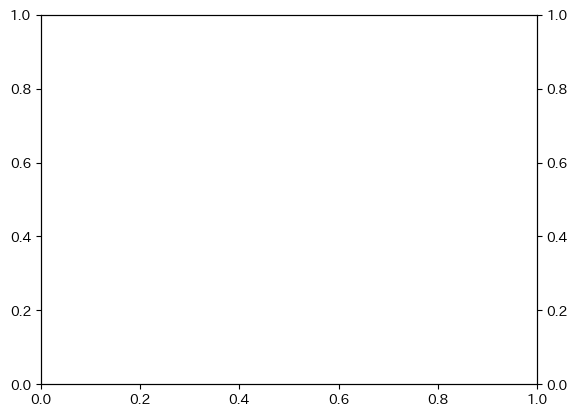

In [225]:
data = pd.read_csv('data/upgradedatafolder/detail.csv', index_col=0, parse_dates=True, encoding='utf-8')
display(data)
for i, j in enumerate(data.index[::100]):
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    #Price_day['N225'].loc[j:data.index[i+100], 'Close'].plot(color='gray', alpha=0.4, ax=ax)
    data.loc[j:,['現物', '先物合計', '現物先物合計']].head(100).plot(ax=ax2, legend=True)
    plt.figure()

In [113]:
pd.set_option('display.max_row', 100)
data4.tail(100)

,累積,前週比,Date.1,dow
2023-06-03,6.926800e+12,9.854000e+11,2023-06-07,2.0
2023-06-10,7.568300e+12,6.414000e+11,2023-06-14,2.0
2023-06-17,7.207800e+12,-3.604000e+11,2023-06-21,2.0
2023-06-24,7.511900e+12,3.041000e+11,2023-06-28,2.0
2023-07-01,7.543300e+12,3.130000e+10,2023-07-05,2.0
2023-07-08,7.822700e+12,2.793000e+11,2023-07-12,2.0
2023-07-15,7.842400e+12,1.970000e+10,2023-07-19,2.0
2023-07-22,7.916200e+12,7.380000e+10,2023-07-26,2.0
2023-07-29,7.935100e+12,1.880000e+10,2023-08-02,2.0
2023-08-05,8.115000e+12,1.799000e+11,2023-08-09,2.0


In [206]:
data3=pd.read_csv('data/upgradedatafolder/substance_foreigner.csv', index_col=0, parse_dates=True, encoding='utf-8')
data3.index = [i-relativedelta(days=4) for i in data3.index]
for key in data3:
    
    data[key] = data3[key].dropna().drop_duplicates().sort_index()
data3

,現物,ラージ,ミニ,TOPIX,先物合計,現物先物合計,Date
2013-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,3.647000e+11,-2.390000e+11,8.640000e+10,3.500000e+09,-1.489000e+11,2.157000e+11,2021-01-06
2021-01-09,2.614000e+11,-3.824000e+11,2.209000e+11,-5.140000e+10,-2.129000e+11,4.840000e+10,2021-01-13
2021-01-16,-1.340000e+11,7.470000e+10,1.040000e+10,-1.900000e+09,8.320000e+10,-5.070000e+10,2021-01-20
2021-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
data = data3[:-9]
data

,現物,ラージ,ミニ,TOPIX,先物合計,現物先物合計,Date
2013-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,3.647000e+11,-2.390000e+11,8.640000e+10,3.500000e+09,-1.489000e+11,2.157000e+11,2021-01-06
2021-01-09,2.614000e+11,-3.824000e+11,2.209000e+11,-5.140000e+10,-2.129000e+11,4.840000e+10,2021-01-13
2021-01-16,-1.340000e+11,7.470000e+10,1.040000e+10,-1.900000e+09,8.320000e+10,-5.070000e+10,2021-01-20
2021-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-09-14,-5.122000e+11,-4.940000e+10,2.100000e+09,-1.230000e+10,-5.970000e+10,-5.719000e+11,2024-09-18
2024-09-14,-5.122000e+11,-4.940000e+10,2.100000e+09,-1.230000e+10,-5.970000e+10,-5.719000e+11,2024-09-18
2024-09-21,-5.670000e+10,-9.300000e+10,5.300000e+09,-2.820000e+10,-1.159000e+11,-1.726000e+11,2024-09-25
2024-09-21,-5.670000e+10,-9.300000e+10,5.300000e+09,-2.820000e+10,-1.159000e+11,-1.726000e+11,2024-09-25


In [213]:
data4=pd.read_csv('data/upgradedatafolder/foreigner_sum.csv', index_col=0, parse_dates=True, encoding='utf-8')
data4 = data4[:-9]
#data4.index = [i-relativedelta(days=4) for i in data4.index]
'''
display(data4)
for i, row in data4.iterrows():
    try:
        data4.loc[i, 'dow'] = get_nth_dow_datetime_dt(pd.to_datetime(i))[1]
    except Exception as e:
        print(e)
        pass
    else:
        print(i)
data4 = data4[data4['dow']==2].rename_axis('Date')
'''
for i, row in data4.iterrows():
    #print(key)
    
    try:
        data.loc[pd.to_datetime(i).strftime('%Y-%m-%d'), '累積'] = row['累積']
    except Exception as e:
        print('X', e)
        print(i)
data4

,累積,前週比,Date
2013-07-17,9.337100e+12,2.513000e+11,2013-07-17
2013-07-24,9.286100e+12,-5.090000e+10,2013-07-24
2013-07-31,9.265700e+12,-2.040000e+10,2013-07-31
2013-08-07,9.164600e+12,-1.010000e+11,2013-08-07
2013-08-14,9.264200e+12,9.950000e+10,2013-08-14
...,...,...,...
2024-09-18,6.504300e+12,-5.122000e+11,2024-09-18
2024-09-25,6.447600e+12,-5.670000e+10,2024-09-25
2024-09-25,6.447600e+12,-5.670000e+10,2024-09-25
2024-10-02,6.843100e+12,3.955000e+11,2024-10-02


In [22]:
data=data.dropna(subset=['PER加重平均'])
data['累積'] = data4['累積']
data

,PER加重平均,PER指数ベース,PBR加重平均,PBR指数ベース,利回り単純計算,利回り指数ベース,EPS加重平均,EPS指数ベース,BPS加重平均,BPS指数ベース,現物,ラージ,ミニ,TOPIX,先物合計,現物先物合計,Date,累積
日付,,,,,,,,,,,,,,,,,,
2006-05-22,19.76,22.37,2.13,2.11,1.06,1.06,802.52,708.89,7445.01,7515.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-23,19.19,22.00,2.02,2.07,1.08,1.08,812.88,709.05,7722.38,7535.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-24,19.75,22.44,2.03,2.09,1.06,1.05,805.43,708.88,7836.06,7611.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-25,19.41,22.13,1.98,2.06,1.08,1.07,808.54,709.16,7926.14,7618.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-26,19.79,22.51,2.01,2.10,1.06,1.06,807.01,709.50,7945.65,7605.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-01,15.60,20.64,1.37,1.91,1.93,1.77,2477.69,1872.67,28213.12,20236.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-04,15.61,20.62,1.37,1.90,1.93,1.77,2475.06,1873.70,28201.18,20334.54,3.955000e+11,2.023000e+11,-3.460000e+10,-1.840000e+10,1.493000e+11,5.448000e+11,2024-10-02,6.843100e+12
2024-10-07,15.88,20.97,1.40,1.94,1.91,1.74,2476.87,1875.67,28094.81,20274.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
data.dropna()

,累積,前週比,Date,Bond_25,Bond_50,Bond_75,Bond_100,Bond_125,Bond_150,Bond_175,...,Bond_300,Bond_325,Bond_350,class,現物,ラージ,ミニ,TOPIX,先物合計,現物先物合計


In [48]:
import calendar
from datetime import date 
def get_nth_week(day):
    return (day - 1) // 7 + 1

def get_nth_dow(year, month, day):
    return get_nth_week(day), calendar.weekday(year, month, day)

def get_day_of_nth_dow(year, month, nth, dow):
    '''dow: Monday(0) - Sunday(6)'''
    if nth < 1 or dow < 0 or dow > 6:
        return None

    first_dow, n = calendar.monthrange(year, month)
    day = 7 * (nth - 1) + (dow - first_dow) % 7 + 1

    return day if day <= n else None
def get_nth_dow_datetime_dt(dt):
    return get_nth_week(dt.day), dt.weekday()
def get_nth_dow_datetime(year, month, day):
    return get_nth_week(day), date(year, month, day).weekday()

def get_date_of_nth_dow(year, month, nth, dow):
    day = get_day_of_nth_dow(year, month, nth, dow)
    return date(year, month, day) if day else None

# 買い残

In [50]:
data.columns

Index(['海外勢', '国内勢投資信託', '事業法人', 'その他法人', '生損保', '銀行', '信託銀行', 'その他金融', '個人現金',
       '個人信用', 'Date', '現物', 'ラージ', 'ミニ', 'TOPIX', '先物合計', '現物先物合計'],
      dtype='object')

In [52]:
data=data[['海外勢', '現物', '先物合計', '現物先物合計']]
data['Data'] = data.index

In [54]:
train_data['Data'] = train_data.index

In [68]:
train_data

,日付け,Bond_25,Bond_50,Bond_75,Bond_100,Bond_125,Bond_150,Bond_175,Bond_200,Bond_225,Bond_250,Bond_275,Bond_300,Bond_325,Bond_350,Data
0,2006-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-02-07
1,2006-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-02-08
2,2006-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-02-09
3,2006-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-02-10
4,2006-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-02-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,2023-11-27,-0.108820,0.049933,0.169925,0.507752,1.041995,0.834906,0.680346,1.315476,0.549801,0.631027,0.744395,2.112000,2.268908,2.188525,2023-11-27
4815,2023-11-28,-0.122847,0.022758,0.145427,0.366726,1.021164,0.801887,0.639485,1.504918,0.528000,0.598326,0.632479,2.056000,2.105691,2.043825,2023-11-28
4816,2023-11-29,-0.174603,-0.044619,0.128682,0.270506,0.866667,0.681293,0.529412,1.267913,0.453094,0.516667,0.600000,1.900398,1.959350,2.008264,2023-11-29
4817,2023-11-30,-0.294737,-0.109043,0.013616,0.111111,0.691919,0.638142,0.763158,1.087227,0.324111,0.372951,0.519274,1.680000,1.680000,1.701613,2023-11-30


In [78]:
train_data

,level_0,index,Bond_25,Bond_50,Bond_75,Bond_100,Bond_125,Bond_150,Bond_175,Bond_200,Bond_225,Bond_250,Bond_275,Bond_300,Bond_325,Bond_350,Data
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-02-07
1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-02-08
2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-02-09
3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-02-10
4,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-02-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,4814,4814,-0.108820,0.049933,0.169925,0.507752,1.041995,0.834906,0.680346,1.315476,0.549801,0.631027,0.744395,2.112000,2.268908,2.188525,2023-11-27
4815,4815,4815,-0.122847,0.022758,0.145427,0.366726,1.021164,0.801887,0.639485,1.504918,0.528000,0.598326,0.632479,2.056000,2.105691,2.043825,2023-11-28
4816,4816,4816,-0.174603,-0.044619,0.128682,0.270506,0.866667,0.681293,0.529412,1.267913,0.453094,0.516667,0.600000,1.900398,1.959350,2.008264,2023-11-29
4817,4817,4817,-0.294737,-0.109043,0.013616,0.111111,0.691919,0.638142,0.763158,1.087227,0.324111,0.372951,0.519274,1.680000,1.680000,1.701613,2023-11-30


In [88]:
data['index']

0     2021-01-02
1     2021-01-09
2     2021-01-16
3     2021-02-06
4     2021-02-13
         ...    
205   2024-09-07
206   2024-09-14
207   2024-09-21
208   2024-09-28
209   2024-10-05
Name: index, Length: 210, dtype: datetime64[ns]

In [94]:
#data = data.reset_index()
train_data=pd.read_csv('traindata/Nikkei_traindata_all.csv', index_col=0, parse_dates=True)
train_data = train_data.reset_index().rename(columns={'日付け':'index'})
train_data['index'] = pd.to_datetime(train_data['index'], format='%Y-%m-%d %H:%M:%S')
data['index'] = pd.to_datetime(data['index'], format='%Y-%m-%d %H:%M:%S')


,index,海外勢,国内勢投資信託,事業法人,その他法人,生損保,銀行,信託銀行,その他金融,個人現金,...,Bond_125,Bond_150,Bond_175,Bond_200,Bond_225,Bond_250,Bond_275,Bond_300,Bond_325,Bond_350


In [109]:
pd.set_option('display.max_row', 100)
data.tail(100)

,海外勢,国内勢投資信託,事業法人,その他法人,生損保,銀行,信託銀行,その他金融,個人現金,個人信用,...,Bond_125,Bond_150,Bond_175,Bond_200,Bond_225,Bond_250,Bond_275,Bond_300,Bond_325,Bond_350
index,,,,,,,,,,,,,,,,,,,,,
2023-06-03,9.854000e+11,-8.010000e+10,6.560000e+10,2.500000e+09,-2.090000e+10,-1.080000e+10,-5.350000e+10,-1.400000e+10,-4.998000e+11,1.790000e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-10,6.414000e+11,-9.340000e+10,9.580000e+10,-5.000000e+08,-2.300000e+09,-4.480000e+10,-8.210000e+10,-2.160000e+10,-6.351000e+11,5.730000e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-17,-3.604000e+11,-1.357000e+11,6.420000e+10,2.600000e+10,-1.120000e+10,-2.480000e+10,-4.074000e+11,-4.800000e+09,3.050000e+10,3.141000e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-24,3.041000e+11,7.710000e+10,-2.060000e+10,1.133000e+11,2.790000e+10,-4.870000e+10,-1.331000e+11,6.300000e+09,-1.745000e+11,7.180000e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-01,3.130000e+10,-1.943000e+11,8.600000e+10,6.730000e+10,-1.900000e+10,-2.080000e+10,-3.860000e+10,-3.000000e-01,8.580000e+10,2.828000e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-08,2.793000e+11,4.340000e+10,9.290000e+10,4.270000e+10,1.160000e+10,-2.240000e+10,-2.603000e+11,-5.930000e+10,5.820000e+10,1.219000e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-15,1.970000e+10,-1.300000e+10,4.320000e+10,-2.100000e+09,-4.900000e+09,-7.000000e+09,4.720000e+10,-9.900000e+09,-1.018000e+11,1.144000e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-22,7.380000e+10,2.120000e+10,3.000000e+10,2.320000e+10,2.720000e+10,-3.550000e+10,-9.440000e+10,-2.800000e+09,-1.918000e+11,6.140000e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-05,1.880000e+10,9.890000e+10,1.615000e+11,-3.510000e+10,-2.540000e+10,-4.060000e+10,-1.822000e+11,-2.100000e+09,-3.700000e+10,3.032000e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
data=data4
for key in train_data:
    try:
        data[key]=train_data[key]
    except:
        print(key)

累積
前週比
Date.1
dow
Bond_25
Bond_50
Bond_75
Bond_100
Bond_125
Bond_150
Bond_175
Bond_200
Bond_225
Bond_250
Bond_275
Bond_300
Bond_325
Bond_350
class
現物
ラージ
ミニ
TOPIX
先物合計
現物先物合計
Date


In [153]:
import time
time.perf_counter()


777550.1791808

In [ ]:
海外勢
('corr:',
 0.14348601079588788,
 '2012-12-01',
 Index(['Bond_50', 'Bond_75', 'Bond_125', 'Bond_350'], dtype='object'),
 3,
 3)

In [235]:
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import matthews_corrcoef
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
from scipy.stats import mstats
import japanize_matplotlib
import time
t1=time.perf_counter()
train_data=data
precision1 = 0
train_len = 800
dataY = pd.DataFrame()
array = [['Bond_75', 'Bond_175', 'Bond_200', 'Bond_225', 'Bond_325', 'Bond_350'],
         ['Bond_50', 'Bond_75','Bond_125', 'Bond_350'],
        ['Bond_250', 'Bond_300', 'Bond_350'],
        ['Bond_200', 'Bond_125', 'Bond_50', 'Bond_75', 'Bond_350'],
        ['Bond_200', 'Bond_50', 'Bond_75', 'Bond_350', 'Bond_150', 'Bond_275'],
        ['Bond_200', 'Bond_125', 'Bond_50', 'Bond_75', 'Bond_350', 'Bond_175'],
        ['Bond_50', 'Bond_75', 'Bond_125', 'Bond_350']]
pair=()
for cols in [['Bond_200', 'Bond_125', 'Bond_50', 'Bond_75', 'Bond_350']]:
        # 買いの場合　5日、50日
        # 売りの場合　3%
    for skip in range(9, 10, 1):
        dic = {}
        for Date in ['2012-12-01']:#, '2015-06-01', '2015-09-01', '2015-12-01']:
            train_data = pd.read_csv('traindata/Nikkei_traindata_all.csv', index_col=0, parse_dates=True)
            
            for key in train_data:
                data[key]=train_data[key]
            train_data = data
            for key in ['海外勢']:
                train_data['class'] = (train_data[key].pct_change(periods=skip) > train_data[key].pct_change(periods=skip).median())
                train_data['class'] = [1 if j is True else 0 for j in train_data['class']]
                #train_data=dataX.dropna(subset=['BPS指数ベース','利回り指数ベース', 'SCFI', '売り残', '買い残'])

                df = train_data[::]
                train_len = (df.shape[0] // 2)
                #df = df.loc[pd.to_datetime(Date):, :]
                y = df['class'][skip:]
                '''
                train_data=pd.read_csv('traindata/Nikkei_traindata_all.csv', index_col=0, parse_dates=True)
                train_data['class'] = (Price_day['N225'].rolling(window=N).mean().pct_change(periods=75)['Close'] > 0.035).astype(int)
                '''
                # 欠損値を列の1つ手前の値で埋める
                %matplotlib inline


                df = df.fillna(method='ffill')

                precision = 0

                #訓練データを説明変数データ(X_train)と目的変数データ(y_train)に分割

                for num1 in [500]:


                    # NG ['PBR指数ベース', 'EPS指数ベース', '先物合計', '売り残'
                    # 'PBR指数ベース', 'EPS指数ベース', 'BPS指数ベース', '売り残'

                    # ['PBR指数ベース', 'EPS指数ベース', '現物', '買い残']
                    # ['PBR指数ベース', 'EPS指数ベース', '現物', '売り残']
                    # ['PBR指数ベース', 'EPS指数ベース', '買い残', '売り残']
                    '''
                    cols=[]
                    for i in df.columns:
                        if 'Bond'in i:
                            cols.append(i)
                    '''
                    X = df[cols].replace(np.inf, np.nan).replace(-np.inf, np.nan).fillna(method='ffill') 
                    #X = df.drop(['class'], axis=1)[['買い残','売り残', '累積']].sample(3, random_state=seed, axis=1).replace(-np.inf, 0).replace(np.inf, 0).dropna() #.sample(4, random_state=seed, axis=1).replace(-np.inf, 0).replace(np.inf, 0).dropna()
                    #train_len = 7


                    rate_prediction = []
                    y_test= []
                    #X = df.drop(['class'], axis=1)

                    for i in tqdm(range(0,len(y)-train_len+1, 1)):

                        X_train = X.iloc[:train_len+i-1,:].values    
                        y_train = y[:train_len+i-1]
                        X_predict = X.iloc[0:train_len+i,:].values 

                        # Winsorize top 1% and bottom 1% of points.
                        # Apply on X_train and X_test separately
                        '''
                        X_train = mstats.winsorize(X_train, limits = [0.01, 0.01])
                        X_predict = mstats.winsorize(X_predict, limits = [0.01, 0.01])
                        '''

                        y_test.append(y[train_len+i-1]) # 6, 7, 8, 9, 10, 11.......


                        # (将来の自分用)depth=6は変更しないこと。
                        depth = 6


                        # Random Forest Classifier
                        # SVM
                        '''
                        model = RandomForestClassifier(random_state=0, 
                                       min_samples_split=5,
                                       max_leaf_nodes=15, 
                                       criterion='gini', 
                                       max_features=None, 
                                       n_estimators=30,
                                       max_depth=depth)
                        '''




                        
                        # 
                        #model = SVC(C=50, kernel = 'rbf', gamma ='auto', random_state=0,probability=True)

                        model = CatBoostClassifier(max_depth=6,
                                    learning_rate=2e-2,
                                    verbose=False,
                                    iterations=num1,
                                    loss_function='Logloss', 
                                    #grow_policy='Lossguide',
                                    #l2_leaf_reg=,
                                    #bagging_temperature= 1,
                                    boosting_type='Ordered')

                        
                        # Fit the model on training data
                        try:
                            model.fit(X_train, 
                                    y_train,
                                    #early_stopping_rounds=5,  # 10回以上精度が改善しなければ中止
                                )
                        except Exception as e:
                            print(e)
                            continue
                        # Make a prediction on testing data
                        # [[],[],[],,,] -> [ , , ,]
                        #plot_feature_importance(model.feature_importances_,X.columns,'CATBOOST')
                        try:
                            pred = model.predict(X_predict[train_len+i-1].reshape(1, -1))
                        except Exception as e:
                            print('a', e)
                            break

                        rate_prediction = np.append(rate_prediction, pred)

                        try:
                            precision = matthews_corrcoef(y_test[:], rate_prediction[:])
                        except Exception as e:
                            print(e)
                            continue
                        #print(precision)
                    dic['No'] = skip
                    dic2 = {name:[1] if name in X.columns else [0] for name in cols}
                    dic.update(dic2)
                    dic['precision'] = precision
                    if precision > precision1:
                        pair = ('corr:', precision, Date, X.columns, skip, num1, key)
                        precision1 = precision
                    temp = pd.DataFrame(dic)
                    try:
                        result = pd.DataFrame(rate_prediction, index=df.index[train_len-1+skip:], columns=['predict'])
                        precision = matthews_corrcoef(y_test[:], rate_prediction)
                    except Exception as e:
                        print('B',e)
                        continue


                    print('corr:', precision, Date, X.columns)
                dataY = pd.concat([dataY, temp])

                display(dataY)


t2=time.perf_counter()
print('演算時間：{}'.format(((t2-t1)/3600)))
result

  0%|          | 0/109 [00:00<?, ?it/s]

corr: 0.19847522071150603 2012-12-01 Index(['Bond_200', 'Bond_125', 'Bond_50', 'Bond_75', 'Bond_350'], dtype='object')


,No,Bond_200,Bond_125,Bond_50,Bond_75,Bond_350,precision
0,9,1,1,1,1,1,0.198475


演算時間：0.20176254788885772


,predict
2023-05-31,0.0
2023-06-07,1.0
2023-06-14,1.0
2023-06-21,1.0
2023-06-28,0.0
...,...
2024-10-30,0.0
2024-11-06,0.0
2024-11-13,0.0
2024-11-20,0.0


In [228]:
pair

('corr:',
 0.2860614517137496,
 '2012-12-01',
 Index(['Bond_200', 'Bond_125', 'Bond_50', 'Bond_75', 'Bond_350'], dtype='object'),
 9,
 1000,
 '海外勢')

In [234]:
result.to_csv('海外勢.csv')

In [232]:
dataY

,No,Bond_75,Bond_175,Bond_200,Bond_225,Bond_325,Bond_350,precision,Bond_50,Bond_125,Bond_250,Bond_300,Bond_150,Bond_275
0,9,1.0,1.0,1.0,1.0,1.0,1,0.174726,NaN,NaN,NaN,NaN,NaN,NaN
0,9,1.0,NaN,NaN,NaN,NaN,1,0.235886,1.0,1.0,NaN,NaN,NaN,NaN
0,9,NaN,NaN,NaN,NaN,NaN,1,0.154682,NaN,NaN,1.0,1.0,NaN,NaN
0,9,1.0,NaN,1.0,NaN,NaN,1,0.286061,1.0,1.0,NaN,NaN,NaN,NaN
0,9,1.0,NaN,1.0,NaN,NaN,1,0.157182,1.0,NaN,NaN,NaN,1.0,1.0
0,9,1.0,1.0,1.0,NaN,NaN,1,0.111518,1.0,1.0,NaN,NaN,NaN,NaN
0,9,1.0,NaN,NaN,NaN,NaN,1,0.235886,1.0,1.0,NaN,NaN,NaN,NaN


In [211]:
train_data[key].pct_change(periods=skip).median()

-0.7790543526292533

In [201]:
train_data[key].pct_change(periods=skip)> train_data[key].pct_change(periods=skip).median()
#train_data[key].pct_change(periods=skip).plot()

日付
2021-01-08    False
2021-01-15    False
2021-01-22    False
2021-01-29    False
2021-02-05    False
              ...  
2024-09-06    False
2024-09-13    False
2024-09-20    False
2024-09-27    False
2024-10-04    False
Name: 買い残, Length: 217, dtype: bool

In [199]:
train_data[key]#.pct_change(periods=6).plot()

日付
2021-01-08     404800000000
2021-01-15     430200000000
2021-01-22     477700000000
2021-01-29     452600000000
2021-02-05     589500000000
                  ...      
2024-09-06    1118400000000
2024-09-13    1425600000000
2024-09-20    1816600000000
2024-09-27    1988100000000
2024-10-04    1854600000000
Name: 買い残, Length: 217, dtype: int64

In [ ]:
'''
海外勢
('corr:',
 0.14348601079588788,
 '2012-12-01',
 Index(['Bond_50', 'Bond_75', 'Bond_125', 'Bond_350'], dtype='object'),
 3,
 3)
 
 累積
('corr:',
 0.31985277244201443,
 '2012-12-01',
 Index(['Bond_200', 'Bond_50', 'Bond_75', 'Bond_350', 'Bond_150', 'Bond_275'], dtype='object'),
 14,
 3,
 '累積')
'''


In [215]:
pair

('corr:',
 0.31985277244201443,
 '2012-12-01',
 Index(['Bond_200', 'Bond_50', 'Bond_75', 'Bond_350', 'Bond_150', 'Bond_275'], dtype='object'),
 14,
 3,
 '累積')

In [176]:
dataY.to_csv('temp3.csv')

In [ ]:
# 'Bond_50', 'Bond_75', 'Bond_150', 'Bond_200', 'Bond_275', 'Bond_350'
# 'Bond_50', 'Bond_75', 'Bond_125', 'Bond_175', 'Bond_200', 'Bond_350'
# 'Bond_75', 'Bond_175', 'Bond_200', 'Bond_225', 'Bond_325', 'Bond_350'
# # 'Bond_25', 'Bond_75', 'Bond_100', 'Bond_200', 'Bond_275', 'Bond_350'
# # 'Bond_75', 'Bond_100', 'Bond_200', 'Bond_225', 'Bond_325'

In [ ]:
没
# Bond_200, Bond_50, Bond_75, Bond_350, Bond_150, Bond_275 
# Bond_200, Bond_125, Bond_50, Bond_75, Bond_350, Bond_175
#  Bond_200, Bond_125, Bond_50, Bond_75, Bond_350,


In [178]:
pair

('corr:',
 0.10860746949682175,
 '2012-12-01',
 Index(['Bond_75', 'Bond_175', 'Bond_200', 'Bond_225', 'Bond_325', 'Bond_350'], dtype='object'),
 5,
 3)

In [ ]:
# ['Bond_75', 'Bond_175', 'Bond_200', 'Bond_225', 'Bond_325', 'Bond_350']
# ['Bond_50', 'Bond_75','Bond_125', 'Bond_350']

In [212]:
dataY.sort_values(by='precision',ascending=False) # 'Bond_50', 'Bond_75', 'Bond_150', 'Bond_200', 'Bond_275', 'Bond_350'

,No,Bond_75,Bond_175,Bond_200,Bond_225,Bond_325,Bond_350,precision,Bond_50,Bond_125,Bond_250,Bond_300,Bond_150,Bond_275
0,3,1.0,1.0,1.0,1.0,1.0,1,0.042181,NaN,NaN,NaN,NaN,NaN,NaN
0,3,1.0,NaN,NaN,NaN,NaN,1,0.042181,1.0,1.0,NaN,NaN,NaN,NaN
0,3,1.0,1.0,1.0,NaN,NaN,1,0.042181,1.0,1.0,NaN,NaN,NaN,NaN
0,3,1.0,NaN,1.0,NaN,NaN,1,0.042181,1.0,NaN,NaN,NaN,1.0,1.0
0,3,NaN,NaN,NaN,NaN,NaN,1,0.042181,NaN,NaN,1.0,1.0,NaN,NaN
0,3,1.0,NaN,1.0,NaN,NaN,1,0.042181,1.0,1.0,NaN,NaN,NaN,NaN
0,6,1.0,1.0,1.0,1.0,1.0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
0,6,1.0,NaN,NaN,NaN,NaN,1,0.000000,1.0,1.0,NaN,NaN,NaN,NaN
0,6,1.0,1.0,1.0,NaN,NaN,1,0.000000,1.0,1.0,NaN,NaN,NaN,NaN
0,14,1.0,NaN,1.0,NaN,NaN,1,0.000000,1.0,NaN,NaN,NaN,1.0,1.0


In [140]:
pair

('corr:',
 0.3419852800536197,
 '2012-12-01',
 Index(['Bond_200', 'Bond_125', 'Bond_50', 'Bond_75', 'Bond_350'], dtype='object'),
 10,
 5)

In [121]:
train_data

,Bond_25,Bond_50,Bond_75,Bond_100,Bond_125,Bond_150,Bond_175,Bond_200,Bond_225,Bond_250,Bond_275,Bond_300,Bond_325,Bond_350
日付け,,,,,,,,,,,,,,
2006-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27,-0.108820,0.049933,0.169925,0.507752,1.041995,0.834906,0.680346,1.315476,0.549801,0.631027,0.744395,2.112000,2.268908,2.188525
2023-11-28,-0.122847,0.022758,0.145427,0.366726,1.021164,0.801887,0.639485,1.504918,0.528000,0.598326,0.632479,2.056000,2.105691,2.043825
2023-11-29,-0.174603,-0.044619,0.128682,0.270506,0.866667,0.681293,0.529412,1.267913,0.453094,0.516667,0.600000,1.900398,1.959350,2.008264


In [437]:
data.to_csv('data/訓練データ_20241030.csv')

In [ ]:
# 'usdjpy'は外す
# 2%

In [ ]:
dataX/c

In [272]:
pd.set_option('display.max_column', None)
dataY.sort_values(by='precision', ascending=False).tail(200).drop_duplicates(subset=['precision'])

,No,PER加重平均,PER指数ベース,PBR加重平均,PBR指数ベース,利回り単純計算,利回り指数ベース,EPS加重平均,EPS指数ベース,BPS加重平均,BPS指数ベース,現物,先物合計,現物先物合計,売り残,売り残前回比,買い残,買い残前回比,差引,比率,比率2,比率3,ラージ,ミニ,TOPIX,Date,SCFI,PER加重平均1wChange,PER指数ベース1wChange,PBR加重平均1wChange,PBR指数ベース1wChange,利回り単純計算1wChange,利回り指数ベース1wChange,EPS加重平均1wChange,EPS指数ベース1wChange,BPS加重平均1wChange,BPS指数ベース1wChange,class,precision
0,19,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.496508
0,17,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.326605
0,24,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.206725
0,23,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.149071
0,14,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.077290


In [ ]:
import os
#os.mkdir('prediction')
result.to_csv('prediction/20241015.csv')

In [522]:

# 計算用
index=1
# 資産のおきなおし


def judge_message(message):
    if message == 'crossed':
        profitline, loss_cut = 'crossed', 'safe'
    elif message == 'losscut.':
        profitline, loss_cut = 'not crossed', 'Losscut.'
    elif message != 'anomally':
        profitline, loss_cut = 'not crossed', 'safe'
    else:
        profitline, loss_cut = 'anomally', 'anomally'
    return (profitline, loss_cut)

def judge_count(message):
    if message == 'crossed':
        profitline, loss_cut = 1, 0
    elif message == 'losscut.':
        profitline, loss_cut = 0, 1
    else:
        profitline, loss_cut = 0, 0
    return (profitline, loss_cut)


def order_pnl(data, idx, losscut_rate, reverse, threshold=None, schedule=pd.read_csv('data/RSI.csv', index_col='Date', parse_dates=True), entry_price=None,fee_on=True):
    '''
    condition = 'rsi9<@threshold-0.1' if not reverse else 'rsi9>@threshold+0.1' 
    condition = True
    try:
        ind, ind2 = idx[0], idx[1]
        checkdate = schedule.query(f'Date >= @ind & {condition}').index[0]
    except:
        return None, None, None, None
    print(ind, ind2)
    '''
    ind, ind2 = idx[0], idx[1]
    try:
        data = data.query('Date >= @ind & Date < @ind2').dropna(how='any', axis=0)
        entry_price = (data.loc[ind:, "Close"]).values[0] if entry_price is None else entry_price
        
        Asset = (data).loc[ind:,"Close"].values[0]
    except Exception as e:
        print(e)
        return None, None, None, None
    # ↓not used
    
    fee = entry_price * 0.022 * 1e-2 * 2
    return_value = 0
    for i,temp in data.iterrows():
      
        
        high_to_open = temp["High"] - entry_price
        open_to_low = entry_price - temp["Low"]
        if reverse: 
            
            # sell order 
            director = -1
            perspective_maxloss = high_to_open 
            perspective_maxprofit = open_to_low 
                
        else:           
            
            # buy order
            director = 1
            perspective_maxloss = open_to_low
            perspective_maxprofit = high_to_open
            pass
        
        losscutsign =  perspective_maxloss > entry_price * (losscut_rate)
        
        if not losscutsign: 
            continue
        elif losscutsign:
            return_value = -1 * entry_price*(losscut_rate) 
            print("check : Losscut.")
            return (return_value, 'losscut.', i, Asset) 
    
    return_value = director*(temp['Close'] - entry_price)
    return (return_value-fee, None, i, Asset) if fee_on else (return_value, None, i, Asset) 

def entry_timing_calculation(data, entry, rate, coordinate=2):
    exit = entry +relativedelta(weeks=coordinate) if True else entry +relativedelta(weeks=coordinate)
    entry_price = data.loc[entry:, 'Close'].values[0]
    #display(data.loc[entry:exit, :])
    for i, row in data.loc[entry:exit, :][1:].iterrows():
        open_to_low = entry_price - row['Low']
        perspective_maxloss = open_to_low
        entrysign =  perspective_maxloss > entry_price * rate*1e-2
        #print('check', i, entry_price * rate*1e-2)
        if entrysign:
            return i, entry_price*(1-rate*1e-2)
    return None, None

def entry_timing_calculation2(data, entry, rate, coordinate=2):
    exit = entry +relativedelta(weeks=coordinate) if True else entry +relativedelta(weeks=coordinate)
    entry_price = data.loc[entry:, 'Close'].values[0]
    #display(data.loc[entry:exit, :])
    for i, row in data.loc[entry:exit, :][1:].iterrows():
        open_to_low = entry_price - row['Low']
        high_to_open = row['High'] - entry_price
        perspective_maxloss = high_to_open
        entrysign =  perspective_maxloss > entry_price * rate*1e-2
        #print('check', i, entry_price * rate*1e-2)
        if entrysign:
            return i, entry_price*(1+rate*1e-2)
    return None, None


def exit_timing_calculation(entry, sqdates=pd.read_csv('data/SQdate.csv', index_col=0, parse_dates=True)):
    sqdates = sqdates[2::3]
    exit = sqdates.loc[entry:, :].index[0]
    if entry == exit:
        return sqdates.loc[entry:, :].index[1]
    return exit
# This code(function) yields to (temporary interest, temporary totalreturn),totalreturn, ideal Asset, and Last trade information, 


def calc(schedule, losscut, reverse, leverage, data2=None, threshold=None, entry_price=None, fee_on=True, coordinate=1, Lcut=pd.read_csv('data/VIsignals.csv', index_col=0, parse_dates=True)):
   
    # "reverse" were the opposite, then What score...?
    if reverse:
        schedule['predict'] = [0 if i == 1 else 1 for i in schedule['predict']]
    # 月次でデータを取っているので、例えば売りのサイン(オーダー)のときにロスカットしてから
    #schedule_entry = schedule.query('Date >= @schedule_entry').index[0]
    
    totalreturn = 0    
    
    losscut_count, profit_count = 0, 0
    
    dic = {}
    df = pd.DataFrame()
    Asset =1
    Day =0
    # 〇DATA ×DATE
    for Day, row in schedule.iterrows(): 
        entry_price=None
        profitline ,loss_cut_sgn = "not crossed", "safe"
        
        schedule_entry = Day 
        try:
            schedule_exit = exit_timing_calculation(schedule_entry)
        except:
            continue
        #schedule_exit = schedule_entry+relativedelta(weeks=coordinate) 
        reverse = False if row['predict'] == 0 else True

        if row['predict'] == 0:
            schedule_entry, entry_price =  entry_timing_calculation2(**{'data':data2, 
                                        'entry':schedule_entry, 
                                        'rate':threshold,
                                        'coordinate':coordinate
                                               })
            
            print(schedule_entry)
            if schedule_entry is None:
                continue
        else:
            continue
        
        # SVM のorder_pnlとは中身が異なる
        # ind, losscut_rate, profit_rate, predict, index=index, ratio=1
        print(schedule_entry, schedule_exit)
        profit, message, day, Asset = order_pnl(**{'data':data2, 
                                        'idx':(schedule_entry, schedule_exit), 
                                        'losscut_rate':losscut,  
                                        'reverse':True, 
                                        'entry_price':entry_price,
                                        'threshold':np.inf,#(Lcut.loc[schedule_entry, 'Close']**(1/1))*20*1e-2,
                                        'fee_on':fee_on})

        print(profit)
        if profit is None:
            continue
        profitline, loss_cut_sgn = judge_message(message)
        losscut_count += judge_count(message)[1]


        profit *= leverage
        totalreturn += profit
        Return = profit / Asset
        Days = (day - schedule_entry).days
        schedule = schedule.query('Date > @schedule_exit')
        
        
        dic = {"Return":Return, 
               #"profitline":profitline,
               "loss_cut":loss_cut_sgn,
               "profit":profit,
               "Asset":Asset,
               "Exit Date":schedule_exit,
                "日数":Days}

        temp = pd.DataFrame(dic, index=[schedule_entry])
        df = pd.concat([df,temp],axis=0)
        

            
    print(f"loss_cut: {losscut_count}", f"profit_count: {profit_count}")
    print(f"totalreturn: {totalreturn}", f"asset: {Asset}", f"yield:{totalreturn / 1}")

    
    return [None, df]
        
        
        
        

In [34]:
def Drawdown(profits):

    # 単利運用での資産額の計算
    total = 1 + np.cumsum(profits)

    # 月ごとのそれまでの最大資産の計算
    max_assets = pd.Series(total).cummax().values

    # ドローダウンの計算
    dd = max_assets - total

    # 最大ドローダウンの計算
    max_dd_percent = max(dd) * 100
    print(f'最大ドローダウン: {max_dd_percent:.3f} %')
    return max(dd)

In [ ]:
# 売りはなし

In [ ]:
# 日経買いOnlyはなし

In [ ]:
dataX #=data

In [ ]:
df

In [ ]:
result

None
None
2023-05-12 00:00:00
2023-05-12 00:00:00 2023-03-10 00:00:00
index 0 is out of bounds for axis 0 with size 0
None
2023-05-15 00:00:00
2023-05-15 00:00:00 2023-06-09 00:00:00
-2103.102807433593
2023-05-17 00:00:00
2023-05-17 00:00:00 2023-06-09 00:00:00
-1661.8786721367157
2023-05-18 00:00:00
2023-05-18 00:00:00 2023-06-09 00:00:00
-1355.339780496091
2023-06-06 00:00:00
2023-06-06 00:00:00 2023-06-09 00:00:00
806.5732074960952
2023-06-13 00:00:00
2023-06-13 00:00:00 2023-06-09 00:00:00
index 0 is out of bounds for axis 0 with size 0
None
None
None
None
None
None
None
2023-09-05 00:00:00
2023-09-05 00:00:00 2023-09-08 00:00:00
17.689377894529798
2023-09-06 00:00:00
2023-09-06 00:00:00 2023-09-08 00:00:00
199.8047196835952
None
None
None
2023-11-15 00:00:00
2023-11-15 00:00:00 2023-12-08 00:00:00
577.4732838632827
2023-11-06 00:00:00
2023-11-06 00:00:00 2023-12-08 00:00:00
-328.2247132851548
None
2023-11-13 00:00:00
2023-11-13 00:00:00 2023-12-08 00:00:00
-50.42307403124709
2023-

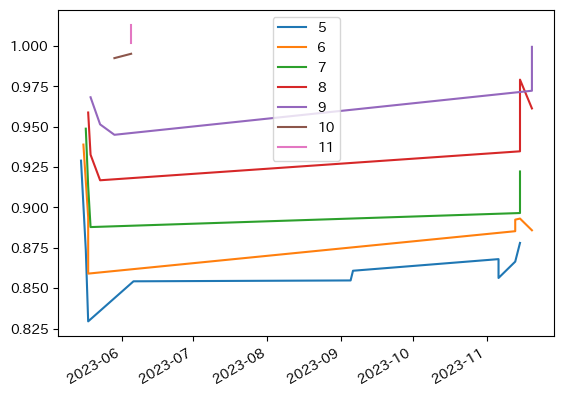

In [527]:
from tqdm.notebook import tqdm
import warnings
import math
warnings.simplefilter('ignore')

i1 = 0
sharp_ratio1 =0
j1=0
lis = []
holder= []
data = pd.read_csv('data/訓練データ_20241030.csv', index_col=0, parse_dates=True)
#schedule0 = pd.read_csv('data/RSI.csv', index_col='Date', parse_dates=True) 
#(1+np.cumsum(Price_day['N225'].pct_change().loc[df.index[0]:'2024-01-09', 'Close'])).plot()
#(1+np.cumsum(data['Return'])).plot(label='{}, {}, {}'.format(threshold, threshold2, threshold3), legend=True)
skip=5
sharp_ratio1=0
for skip in range(10, 9, -1):
    
    threshold, threshold2 = 50, 70
    # (12, (0, 0), 1)
    for threshold in [5, 6, 7, 8, 9,10, 11]:
            data['class'] = (data['現物'].pct_change(periods=skip) > data['現物'].pct_change(periods=skip).describe()['50%'].astype(float)*1e-2).astype(float)
            result['predict'] = data['class']  
            result = result.rename_axis('Date')

            #bond_leverage = 1
            #ratio = ratio**(-1)
            for a in [np.inf]:
                    #for ratio_lev in range(66,67, 10):
                    # threshold 40, threshold2 60 short 
                    loss_cut = 0.01 * a

                    


                    dic = dict(schedule=result,
                            losscut=loss_cut,
                            reverse=False,
                            leverage=1, 
                            data2=N225,
                            #ratio=0,
                            #bond_leverage=bond_leverage,
                            threshold=threshold,
                            coordinate=skip)

                    
                    _, df = calc(**dic)
                    (1+np.cumsum(df['Return'])).plot(label='{}'.format(threshold), legend=True)
                    dic['losscut']=np.inf
                    dic['schedule'] = pd.DataFrame([1 for u in range(len(result))], index=result.index, columns=['predict'])
                    dic['reverse'] = False
                    '''
                    _, df2 = calc(**dic)  # 第４因数は、Falseの方がデフォです。

                    data2 = df2.dropna(how='any', axis=0) #pd.concat([df, df2]).sort_index()
                    try:
                        (1+np.cumsum(data2['Return'])).plot(label='Market'.format(), legend=True)
                    except:
                        continue
                    try:
                        dd = Drawdown(df2['Return'])
                    except Exception as e:
                        print(e)
                        continue
                    '''
                    #sharp_ratio = np.mean(data['Return'].values)*np.sqrt(255/threshold) /np.std(data['Return'], ddof=1)
                    #print(sharp_ratio)
                    
                    sharp_ratio = np.mean(df['Return'].values) /np.std(df['Return'], ddof=1)
                    lis.append(sharp_ratio)
                    if sharp_ratio > sharp_ratio1:

                        last_losscut = a

                        sharp_ratio1 = sharp_ratio
                        pair=(skip, threshold)



    holder.append(pair)

print(
    f"last_losscut　：{last_losscut}",   
    f'pair:{pair}',
    #f"threshold :{threshold1}",
    f"sharpratio : {sharp_ratio1}")   

In [459]:
last_losscut

inf

In [ ]:
df

In [ ]:
result

In [498]:
pair

(1, 51)

In [495]:
df2

,Return,loss_cut,profit,Asset,Exit Date,日数
2023-01-27,0.044866,safe,1228.541517,27382.560547,2023-03-10,41
2023-02-03,0.040044,safe,1101.585290,27509.460938,2023-03-10,34
2023-02-10,0.033970,safe,939.994690,27670.980469,2023-03-10,27
2023-03-03,0.024470,safe,683.391600,27927.470703,2023-03-10,6
2023-03-10,0.123825,safe,3484.915481,28143.970703,2023-06-09,90
...,...,...,...,...,...,...
2024-09-06,0.060400,safe,2198.050254,36391.468750,2024-12-13,52
2024-09-13,0.054882,safe,2007.673556,36581.761719,2024-12-20,45
2024-09-20,0.022930,safe,865.022573,37723.910156,2024-12-27,38
2024-09-27,-0.031172,safe,-1241.552350,39829.558594,2025-01-03,31


In [ ]:
for i, j in Price_day.iterrows():
    print(type(i))

In [ ]:
data.to_csv('オミットデータサンプル2.csv')

In [ ]:
schedule

In [ ]:
df2

In [ ]:
    for threshold in [40]:
        for threshold2 in [50]:
            for threshold3 in [38]:

In [ ]:
holder

In [ ]:
data

In [ ]:
(1+np.cumsum(Price_day['N225'].pct_change().loc['2009-05-28':'2024-01-09', 'Close'])).plot()

In [ ]:
# 70 -> 30 OK

In [ ]:
from tqdm.notebook import tqdm
import warnings
import math
warnings.simplefilter('ignore')
def Request_schedule(schedule, type_='long',num=9, threshold=-90, threshold2=80):
    lever=False
    # 80未満にすること
    '''
    for idx, row in schedule.iterrows():
        if row['rci{}'.format(num)]  > threshold:
            if lever:
                schedule.loc[idx, 'Mark'] = 1
                lever = False
                continue
            schedule.loc[idx, 'Mark'] = 0
            lever = False
        if (row['rci{}'.format(num)] <= threshold):
            schedule.loc[idx, 'Mark'] = 2
            lever = True
    '''
    schedule['Mark'] = [0 for i in range(len(schedule))]
    lever=False
    if type_ == 'long':
        for idx, row in schedule.iterrows():
            '''
            if schedule.loc[idx, 'Mark'] == 1:
                continue
            '''
            if row['rsi{}'.format(num)] > threshold2:
                if lever:
                    schedule.loc[idx, 'Mark'] = 1
                    lever = False
                    continue
                schedule.loc[idx, 'Mark'] = 0
                lever = False
            if (row['rsi{}'.format(num)] < threshold2):
                lever = True
        schedule['long'] = np.where(schedule['Mark']==1, 1, 0)

        return schedule
    if type_!= 'long':
        for idx, row in schedule.iterrows():
            '''
            if schedule.loc[idx, 'Mark'] == 1:
                continue
            '''
            if row['rsi{}'.format(num)] < threshold2:
                if lever:
                    schedule.loc[idx, 'Mark'] = 1
                    lever = False
                    continue
                schedule.loc[idx, 'Mark'] = 0
                lever = False
            if (row['rsi{}'.format(num)] > threshold2):
                lever = True
        
       
        
        if type_ == 'short':
            schedule[type_] = np.where(schedule['Mark']==1, 1, 0)  
        else:
            schedule['long'] = np.where(schedule['Mark']==1, 1, 0) 
        return schedule
i1 = 0
sharp_ratio1 =0
j1=0
lis = []
holder= []
#schedule0 = pd.read_csv('data/RSI.csv', index_col='Date', parse_dates=True) 

for num in range(1):
    sharp_ratio1=0
    threshold, threshold2 = 50, 70
    # (12, (0, 0), 1)
    for threshold in [30]:
        for threshold2 in [70, 50, 40, 30]:
            for threshold3 in [24]:
                for bond_leverage, ratio, lev in [(12, (1, 0), 1)]: # 
                        #bond_leverage = 1
                        #ratio = ratio**(-1)
                        for a in [np.inf]:
                            for ratio_lev in range(66, 67, 10):
                                # threshold 40, threshold2 60 short 
                                loss_cut = 0.01 * a

                                schedule=Request_schedule(schedule0.loc['2005-07-01':, :], type_='long',threshold2=threshold2)#.sample(300, random_state=0, axis=0).sort_index()
                                schedule=Request_schedule(schedule, type_='short',threshold2=threshold2)#.sample(300, random_state=0, axis=0).sort_index()



                                dic = dict(schedule=schedule,
                                        losscut=loss_cut,
                                        reverse=True,
                                        leverage=lev, 
                                        data2=Price_day,
                                        ratio=ratio[0]*(ratio_lev)*1e-2,
                                        bond_leverage=bond_leverage,
                                        threshold=threshold2+30)
                                _, df = calc(**dic)  # 第４因数は、Falseの方がデフォです。

                                schedule=Request_schedule(schedule0.loc['2005-07-01':, :], type_='long2',threshold2=threshold)#.sample(300, random_state=0, axis=0).sort_index()
                                schedule=Request_schedule(schedule, type_='short',threshold2=threshold2)#.sample(300, random_state=0, axis=0).sort_index()
                                dic['schedule'] = schedule
                                dic['threshold'] = threshold2+20

                                #_, df2 = calc(**dic)  # 第４因数は、Falseの方がデフォです。

                                data = df#pd.concat([df, df2]).sort_index()
                                try:
                                    (1+np.cumsum(-data['Return'])).plot(label='{}, {}, {}'.format(threshold, threshold2, threshold3), legend=True)
                                except:
                                    continue
                                try:
                                    dd = Drawdown(-df2['Return'])
                                except Exception as e:
                                    print(e)
                                    continue
                                sharp_ratio = np.mean(-data['Return'].values) /np.std(data['Return'], ddof=1)
                                print(sharp_ratio)

                                lis.append(sharp_ratio)
                                if sharp_ratio > sharp_ratio1:

                                    last_losscut = a

                                    sharp_ratio1 = sharp_ratio
                                    pair=(threshold, threshold2, threshold3)
                                    #pair = 
                                    #pair = (sharp_ratio, ratio, ratio_lev, bond_leverage)
                                    ratio1 = ratio
                                    br=bond_leverage


    holder.append(pair)

print(
    f"last_losscut　：{last_losscut}",   
    #f"last_profitlevel : {last_profitlevel} ",
    f"ratio :{ratio1}",
    f"bond_leverage :{br}",
    #f"threshold :{threshold1}",
    f"sharpratio : {sharp_ratio1}")   

In [ ]:
holder

In [ ]:
lis

In [ ]:
df.shape[0]

In [ ]:
holder

In [ ]:
schedule0.query('rsi9>=60').diff().describe()

In [ ]:
df2

# 売り　スペア　スケジュール

In [ ]:
def Request_schedule(schedule, type_='long',num=9, threshold=-90, threshold2=80):
    lever=False
    # 80未満にすること
    '''
    for idx, row in schedule.iterrows():
        if row['rci{}'.format(num)]  > threshold:
            if lever:
                schedule.loc[idx, 'Mark'] = 1
                lever = False
                continue
            schedule.loc[idx, 'Mark'] = 0
            lever = False
        if (row['rci{}'.format(num)] <= threshold):
            schedule.loc[idx, 'Mark'] = 2
            lever = True
    '''
    schedule['Mark'] = [0 for i in range(len(schedule))]
    lever=False
    if type_!= 'long':
        for idx, row in schedule.iterrows():
            '''
            if schedule.loc[idx, 'Mark'] == 1:
                continue
            '''
            if row['rsi{}'.format(num)] > threshold2:
                if lever:
                    schedule.loc[idx, 'Mark'] = 1
                    lever = False
                    continue
                schedule.loc[idx, 'Mark'] = 0
                lever = False
            if (row['rsi{}'.format(num)] < threshold2):
                lever = True
        
        if type_ == 'short':
            schedule[type_] = np.where(schedule['Mark']==1, 1, 0)  
        else:
            schedule['short'] = np.where(schedule['Mark']==1, 1, 0) 
        return schedule
    if type_== 'long':
        for idx, row in schedule.iterrows():
            '''
            if schedule.loc[idx, 'Mark'] == 1:
                continue
            '''
            if row['rsi{}'.format(num)] < threshold2:
                if lever:
                    schedule.loc[idx, 'Mark'] = 1
                    lever = False
                    continue
                schedule.loc[idx, 'Mark'] = 0
                lever = False
            if (row['rsi{}'.format(num)] > threshold2):
                lever = True
        
        schedule['long'] = np.where(schedule['Mark']==1, 1, 0)
        return schedule

In [ ]:
holder

In [ ]:
# No hedge
graph(df, False, './graph_image/Nikkei_future_3moNeo', True)

In [ ]:
def Evaluation(df):
    Sel = pd.Series()
    Sel['初期資金'] = df['open_price'][0]
    
    Sel["全トレード数"] = df.shape[0]
    #print((10**2) * df.query('interest >= 0').count() / df.shape[0])
    Sel["勝率"] = "{:.2f}%".format((10**2) * df.query('interest >= 0').shape[0] / df.shape[0])
    Sel["負率"] = "{:.2f}%".format((10**2)* df.query('interest < 0').shape[0] / df.shape[0])
    Sel["全トレード平均利益"] = df['interest'].mean()
    Sel["勝ちトレード平均利益"] =  df.query('interest >= 0')['interest'].mean()
    Sel["負けトレード平均利益"] =  df.query('interest < 0')['interest'].mean()
    
    Sel["プロフィットファクター"] = df.query('interest >= 0')['interest'].sum() / -df.query('interest < 0')['interest'].sum()
    
    display(pd.DataFrame(Sel))
    fig, ax = plt.subplots()
    ax.hist(df['interest'], bins=20, label='interest')
Evaluation(df.query('signal!=1'))

In [ ]:
JaBond = Price_day['JaBond']

In [ ]:
usdjpy = yf.download('usdjpy=x', start=JaBond.index[0], end=JaBond.index[-1])

In [ ]:
pd.concat([JaBond['Close'], usdjpy['Close']], axis=1).dropna(how='any').corr()